In [1]:
TF_DIR = "/home/input/openpose_tryout/tf-pose-estimation"

In [2]:
%cd "$TF_DIR"

/home/input/openpose_tryout/tf-pose-estimation


In [3]:
# 標準使用ライブラリー
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc
import os
import shutil

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import json
import datetime
import math
plt.style.use('dark_background')

from pathlib import Path

import logging
import ffmpeg
import re
import sys
import time
import cv2

from pylab import rcParams

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
%matplotlib


Using matplotlib backend: agg


In [4]:
MOVIE_DIR = Path("/home/input/openpose_tryout/movies/")
MOVIE2IMG_DIR = Path( "/home/input/openpose_tryout/images_output/")
MOVIE2IMG_LOCAS_DIR = Path( "/home/input/openpose_tryout/images_locas_output/")
MOVIE_OUTPUT_LOCAS_DIR =  Path("/home/input/openpose_tryout/movies_output_locas/")

In [5]:
##################################
#  独自ライブラリー： mshow
# (複数に対応したノートブック上画像表示)
##################################
import cv2;import numpy as np;import matplotlib as mpl;import matplotlib.pyplot as plt
%matplotlib inline
def mshow(img1=None, img2=None, img3=None, img4=None, img5=None, *, img_list = []):

    imgs = list(filter( lambda x: x is not None, [img1, img2, img3, img4, img5])) 
    imgs.extend(img_list)
    
    if len(imgs) == 1:
        # 一枚のとき
        imgs[0] = imgs[0].astype(np.uint8)
        im4p = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB)
        plt.imshow(im4p)

    elif len(imgs) < 10:
        # 複数枚のとき。横に並べていく
        plt.figure(figsize=(len(imgs)*4, len(imgs)*4))
        fig_exh_base = 100+len(imgs)*10
        for idx, tmp_img in enumerate(imgs):
            tmp_img = tmp_img.astype(np.uint8)
            tmp_im4p = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
            
            plt.subplot(fig_exh_base+idx+1)
            plt.imshow(tmp_im4p)
        
    else :
        plt.figure(figsize=(4*4, 4*4))
        for i in range(5):
            for j in range(5):
                
                if len(imgs) < 5*i+j+1:
                    break
                tmp_img = imgs[5*i+j].astype(np.uint8)
                tmp_im4p = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
                
                
                plt.subplot2grid((5,5), (i,j))
                plt.imshow(tmp_im4p)
        
        
        

In [6]:
stream = ffmpeg.input(str(MOVIE_DIR) + "/moriwaki_720.mp4")

In [7]:
tmp_dir =  "./tmp_img"
os.path.exists(tmp_dir)

True

In [8]:
###########################
# 動画読み込みチェック
###########################
import cv2;
def checkMoviePerSec ( stream , movie_duration) : 
    tmp_dir =  Path("./tmp_img") # 画像を仮保存する

    # 存在チェック、中の画像を一度空に
    if not os.path.exists(str(tmp_dir)):
        os.mkdir(str(tmp_dir))
    for f in tmp_dir.glob("*.jpg"):
        f.unlink()

    # 動画の尺。25秒以上のものは、25秒まで。 
    check_duration = movie_duration if movie_duration < 25 else 25
    
    # 1秒ずつ、そのタイミングの画像を保存
    for sec in range(1, check_duration):
        ffmpeg.output(stream, str(tmp_dir)+"/" + str(sec)  +".jpg", ss=sec, vframes=1, f='image2').run()

    imgs = [] #画像をいれるリスト
    for idx in range(1, check_duration):
        tmp_img = cv2.imread(str(tmp_dir) + "/" +str(idx)+".jpg" )
        imgs.append( tmp_img   )
    
    # open cvで読み込んだ画像を並べて表示
    mshow(img_list = imgs)
    return imgs


In [9]:
probe = ffmpeg.probe(str(MOVIE_DIR) + "/moriwaki_360.mp4")
movie_duration = math.floor(float(probe['streams'][0]["duration"]))

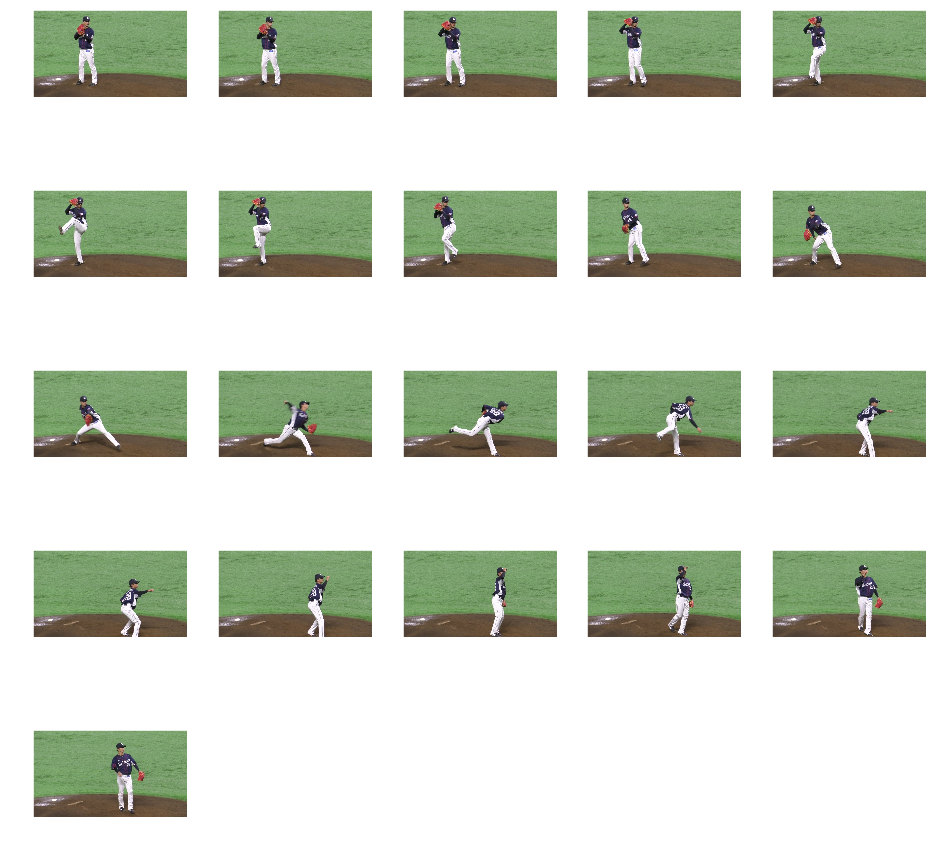

In [10]:
imgs =checkMoviePerSec(stream, movie_duration)

In [11]:
# 画像を空にする
for f in MOVIE2IMG_DIR.glob("*.jpg"):
    f.unlink()

In [12]:
stream.output(
    filename=str(MOVIE2IMG_DIR / "%06d.jpg"), ss=0, r=30000/1001, start_number=000000)\
    .run()


(None, None)

In [13]:
# この辺のパラメータは理解できてない
resize='0x0'
model = "cmu"
resize_out_ratio=4.0

# ここも良く分からない
w, h = model_wh(resize)
if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path(model), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

[2020-08-19 03:18:11,793] [TfPoseEstimator] [INFO] loading graph from /home/input/openpose_tryout/tf-pose-estimation/models/graph/cmu/graph_opt.pb(default size=432x368)


TfPoseEstimator/Openpose/concat_stage7/axis
TfPoseEstimator/Mconv7_stage6_L2/biases
TfPoseEstimator/Mconv7_stage6_L2/weights
TfPoseEstimator/Mconv6_stage6_L2/biases
TfPoseEstimator/Mconv6_stage6_L2/weights
TfPoseEstimator/Mconv5_stage6_L2/biases
TfPoseEstimator/Mconv5_stage6_L2/weights
TfPoseEstimator/Mconv4_stage6_L2/biases
TfPoseEstimator/Mconv4_stage6_L2/weights
TfPoseEstimator/Mconv3_stage6_L2/biases
TfPoseEstimator/Mconv3_stage6_L2/weights
TfPoseEstimator/Mconv2_stage6_L2/biases
TfPoseEstimator/Mconv2_stage6_L2/weights
TfPoseEstimator/Mconv1_stage6_L2/biases
TfPoseEstimator/Mconv1_stage6_L2/weights
TfPoseEstimator/Mconv7_stage6_L1/biases
TfPoseEstimator/Mconv7_stage6_L1/weights
TfPoseEstimator/Mconv6_stage6_L1/biases
TfPoseEstimator/Mconv6_stage6_L1/weights
TfPoseEstimator/Mconv5_stage6_L1/biases
TfPoseEstimator/Mconv5_stage6_L1/weights
TfPoseEstimator/Mconv4_stage6_L1/biases
TfPoseEstimator/Mconv4_stage6_L1/weights
TfPoseEstimator/Mconv3_stage6_L1/biases
TfPoseEstimator/Mconv3_st

In [14]:
files = sorted(MOVIE2IMG_DIR.glob('*.jpg'))

In [15]:
# 画像を空にする
for f in MOVIE2IMG_LOCAS_DIR.glob("*.jpg"):
    f.unlink()

In [ ]:
RightHandIdx = 4
test_imgs = []
right_hand_pre_pos = (168, 70)
right_hand_poses = []

for file_idx, file in enumerate( files):
    # 元画像を1枚ずつ読み込み
    tmp_img = cv2.imread(str(file))
    img_h, img_w = tmp_img.shape[:2]
    
    # 実行本体 humansに推定結果が返る
    humans = e.inference(tmp_img, resize_to_default=(w > 0 and h > 0), upsample_size=resize_out_ratio)
    # 人の線の描画
    #tmp_img_draw = TfPoseEstimator.draw_humans(tmp_img, humans, imgcopy=True)

    # 右手のポジションを取得 4が右手
    if len(humans)>0:
        if RightHandIdx in humans[0].body_parts.keys():
            right_hand_rel = humans[0].body_parts[4]
            right_hand_pos = (int( right_hand_rel.x * img_w + 0.5),   int(right_hand_rel.y * img_h + 0.5))

    right_hand_poses.append(right_hand_pos)
    
#     if file_idx > 300:
#         break
        
#     centers = {}
#     for i in range(common.CocoPart.Background.value):
#         if i not in humans[0].body_parts.keys():
#             continue
#         body_part = humans[0].body_parts[i]
#         center = (int(body_part.x * img_w + 0.5), int(body_part.y * img_h + 0.5))
#         centers[i] = center


In [ ]:
for file_idx, file in enumerate( files):
    tmp_img = cv2.imread(str(file))
    for i in range(file_idx-1):
        if i == 0:continue
        
        tmp_img_locas = cv2.line(tmp_img, right_hand_poses[i] , right_hand_poses[i-1] , (0, 0, 255), thickness=2, lineType=cv2.LINE_8, shift=0)
        test_imgs.append(tmp_img_locas)
        cv2.imwrite(str(MOVIE2IMG_LOCAS_DIR / "{:06d}.jpg".format(file_idx) ), tmp_img_locas)
#     if file_idx > 300:
#         break

In [ ]:
# 動画フォルダを空にする
for f in MOVIE_OUTPUT_LOCAS_DIR.glob("*.mp4"):
    f.unlink()

In [ ]:

# ffmpegの仕様で、連番の画像を以下のように指定する。フレームレートは、29.97fpsのこと
jpg = ffmpeg.input(str(MOVIE2IMG_LOCAS_DIR/ "%06d.jpg"), framerate=30000/1001)

# ffmpeg-pythonは普通にかくと、エラーやログが見えないので注意。
try:
    message = ffmpeg.output(
        jpg,
#         mp3,
        filename=str(MOVIE_OUTPUT_LOCAS_DIR/"result.mp4"),
        vcodec='libx264', 
        acodec='aac',
        strict='experimental',
        ab=192000,
        ac=2,
        ar=48000,
        pix_fmt='yuv420p'
        ) \
        .run(capture_stdout=True, capture_stderr=True)
except ffmpeg.Error as e:
    print('stdout:', e.stdout.decode('utf8'))
    print('stderr:', e.stderr.decode('utf8'))
    raise e

print('stdout:', message) 


## 成功してれば、指定のフォルダにmp4ファイルが出来ている　 